In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
identifier = "GSE206932_age"
results_file = "/Users/jolivie1/Desktop/Research/equivalence_testing_output/scripts/output/equiv_test_vectorized/{}_1.0_results.csv".format(identifier)
deseq_file = "/Users/jolivie1/Desktop/Research/equivalence_testing_output/scripts/output/deseq_normalization/{}_deseq2_results.csv".format(identifier)

results = pd.read_csv(results_file,index_col = 0)

deseq2 = pd.read_csv(deseq_file,index_col = 0)


In [3]:
results

,avg_group1_log2,avg_group2_log2,nnz_group1,nnz_group2,eff_size,avg_group1,avg_group2,fold_change,diff_pval,equiv_pval,diff_pval_adj,equiv_pval_adj,sig_diff,sig_equiv
Prrxl1,6.083772,3.325149,6,6,2.758623,67.826258,10.022349,6.767501,3.388911e-09,9.999999e-01,0.000094,9.999999e-01,True,False
Scgn,6.825182,3.747797,6,6,3.077385,113.392540,13.433816,8.440829,5.802966e-09,9.999999e-01,0.000094,9.999999e-01,True,False
Rfng,9.092809,9.510107,6,6,-0.417298,546.019601,729.167929,0.748826,1.399436e-08,3.015951e-10,0.000150,1.045919e-08,False,True
Sema5b,7.535782,5.774549,6,6,1.761234,185.565186,54.740956,3.389878,2.272211e-08,9.999820e-01,0.000183,9.999999e-01,True,False
Ephb2,8.706187,9.438369,6,6,-0.732182,417.660430,693.796616,0.601993,4.458125e-08,1.136613e-04,0.000262,3.273623e-04,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zc3h8,6.294303,6.294354,6,6,-0.000051,78.482720,78.485497,0.999965,9.996445e-01,2.440081e-06,0.999713,9.984458e-06,False,True
n.R5s197,1.892780,1.892667,6,6,0.000112,3.713500,3.713211,1.000078,9.996722e-01,1.872066e-03,0.999713,4.164854e-03,False,True
Gm25821,0.685335,0.685499,4,3,-0.000164,1.608076,1.608258,0.999887,9.996806e-01,1.636953e-02,0.999713,2.680222e-02,False,True
Olfr1301,0.449902,0.450075,2,2,-0.000173,1.365947,1.366111,0.999880,9.996823e-01,2.015926e-02,0.999713,3.175621e-02,False,True


In [4]:
deseq2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Trank1,246.808990,-3.365156,0.201387,-16.709869,1.110789e-62,2.398971e-58
Cilp2,2835.185832,1.858988,0.113645,16.357906,3.820415e-60,4.125475e-56
Scgn,62.765063,-3.158782,0.206885,-15.268305,1.243639e-52,8.952957e-49
Igha,2599.394455,-3.588878,0.238906,-15.022129,5.259144e-51,2.839544e-47
Col1a1,56582.346644,1.186653,0.082271,14.423646,3.674077e-47,1.586981e-43
...,...,...,...,...,...,...
AC117663.3,1.972742,-0.975969,0.851461,-1.146228,2.517008e-01,NaN
AL772212.1,0.000000,NaN,NaN,NaN,NaN,NaN
AL805980.1,1.037664,-0.143999,1.325794,-0.108613,9.135093e-01,NaN
AL590997.4,0.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
merged = pd.concat([results, deseq2], join = "inner",axis=1)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


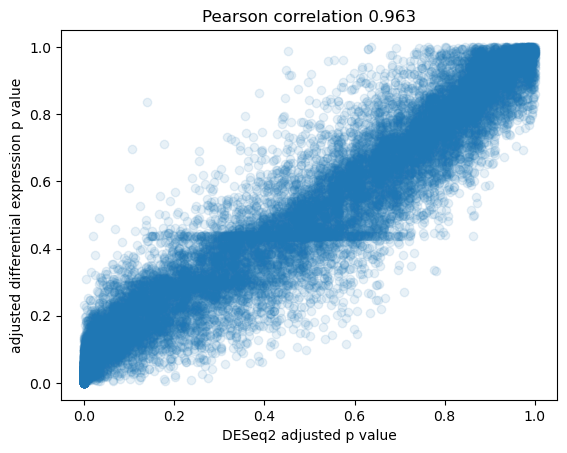

In [6]:
plt.plot(merged["padj"],merged["diff_pval_adj"], marker = "o", linestyle="", alpha = 0.1)
plt.xlabel("DESeq2 adjusted p value")
plt.ylabel("adjusted differential expression p value")
plt.title("Pearson correlation {:.3f}".format(merged["padj"].corr(merged["diff_pval_adj"])))
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


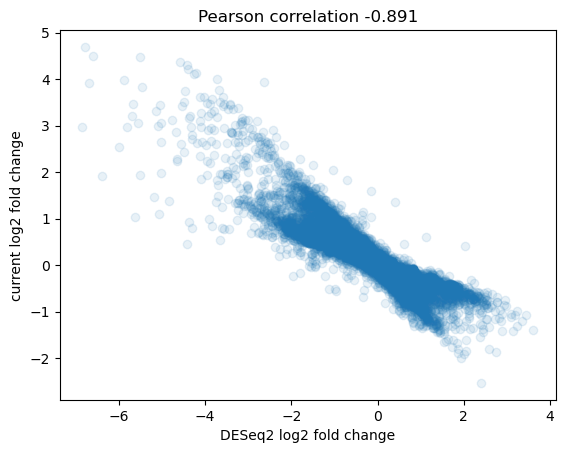

In [10]:
col1 = "log2FoldChange"
col2 = "eff_size"
plt.plot(merged[col1],merged[col2], marker = "o", linestyle="", alpha = 0.1)
plt.title("Pearson correlation {:.3f}".format(merged[col1].corr(merged[col2])))

plt.xlabel("DESeq2 log2 fold change")
plt.ylabel("current log2 fold change")
plt.show()

In [8]:
print("correlation",merged["padj"].corr(merged["diff_pval_adj"]))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
correlation 0.9629157518391939


In [18]:
merged["avg_log2"] = merged[["avg_group1_log2", "avg_group2_log2"]].mean(axis=1)

In [19]:
merged

,avg_group1_log2,avg_group2_log2,nnz_group1,nnz_group2,eff_size,avg_group1,avg_group2,fold_change,diff_pval,equiv_pval,...,equiv_pval_adj,sig_diff,sig_equiv,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,avg_log2
Prrxl1,6.083772,3.325149,6,6,2.758623,67.826258,10.022349,6.767501,3.388911e-09,9.999999e-01,...,9.999999e-01,True,False,38.391780,-2.912465,0.256391,-11.359466,6.655052e-30,4.956178e-27,4.704460
Scgn,6.825182,3.747797,6,6,3.077385,113.392540,13.433816,8.440829,5.802966e-09,9.999999e-01,...,9.999999e-01,True,False,62.765063,-3.158782,0.206885,-15.268305,1.243639e-52,8.952957e-49,5.286490
Rfng,9.092809,9.510107,6,6,-0.417298,546.019601,729.167929,0.748826,1.399436e-08,3.015951e-10,...,1.045919e-08,False,True,636.821347,0.420759,0.046544,9.040058,1.565887e-19,4.175118e-17,9.301458
Sema5b,7.535782,5.774549,6,6,1.761234,185.565186,54.740956,3.389878,2.272211e-08,9.999820e-01,...,9.999999e-01,True,False,119.857511,-1.754390,0.129035,-13.596262,4.214309e-42,1.300235e-38,6.655165
Ephb2,8.706187,9.438369,6,6,-0.732182,417.660430,693.796616,0.601993,4.458125e-08,1.136613e-04,...,3.273623e-04,False,True,555.402234,0.729779,0.057333,12.728729,4.094520e-37,6.802257e-34,9.072278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zc3h8,6.294303,6.294354,6,6,-0.000051,78.482720,78.485497,0.999965,9.996445e-01,2.440081e-06,...,9.984458e-06,False,True,78.083658,-0.012566,0.135406,-0.092801,9.260614e-01,9.688586e-01,6.294329
n.R5s197,1.892780,1.892667,6,6,0.000112,3.713500,3.713211,1.000078,9.996722e-01,1.872066e-03,...,4.164854e-03,False,True,2.879322,0.045929,0.619851,0.074096,9.409336e-01,9.754035e-01,1.892723
Gm25821,0.685335,0.685499,4,3,-0.000164,1.608076,1.608258,0.999887,9.996806e-01,1.636953e-02,...,2.680222e-02,False,True,0.767752,0.088286,1.299458,0.067941,9.458330e-01,NaN,0.685417
Olfr1301,0.449902,0.450075,2,2,-0.000173,1.365947,1.366111,0.999880,9.996823e-01,2.015926e-02,...,3.175621e-02,False,True,0.544264,-0.029352,1.859817,-0.015782,9.874080e-01,NaN,0.449988


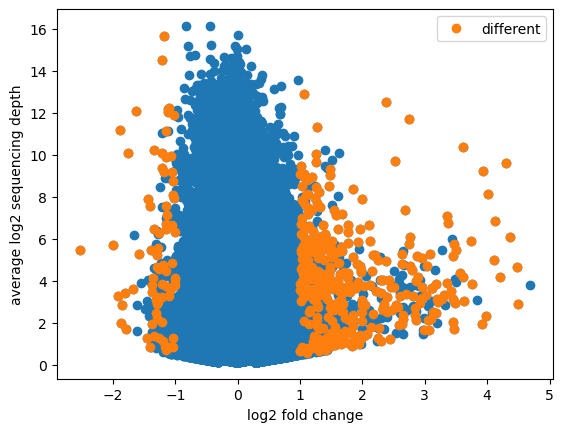

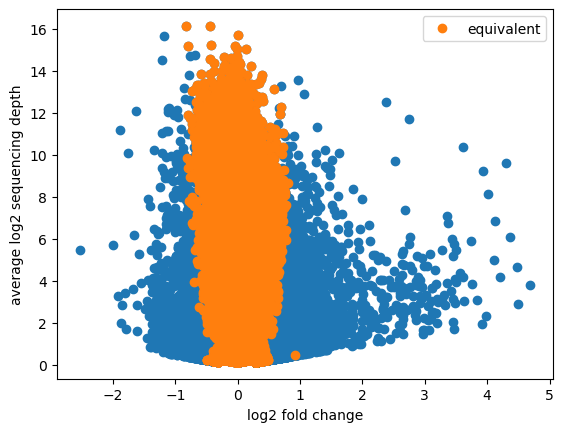

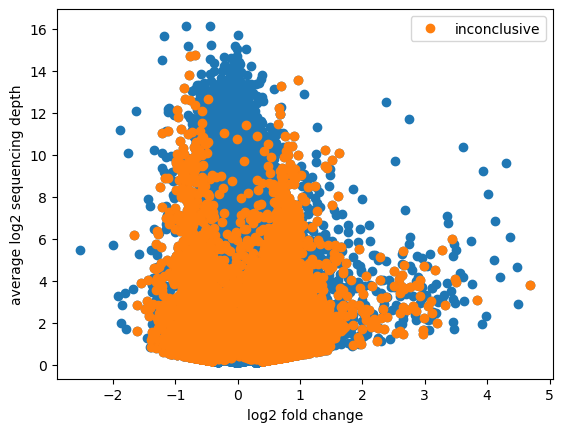

In [59]:
results["avg_log2"] = results[["avg_group1_log2", "avg_group2_log2"]].mean(axis=1)
for cat, group in results.groupby("category"):
    plt.plot(results["eff_size"],results["avg_log2"], marker = "o", linestyle="")
    plt.plot(group["eff_size"],group["avg_log2"], marker = "o", linestyle="", label = cat)
    plt.ylabel("average log2 sequencing depth")
    plt.xlabel("log2 fold change")
    plt.legend()
    plt.show()

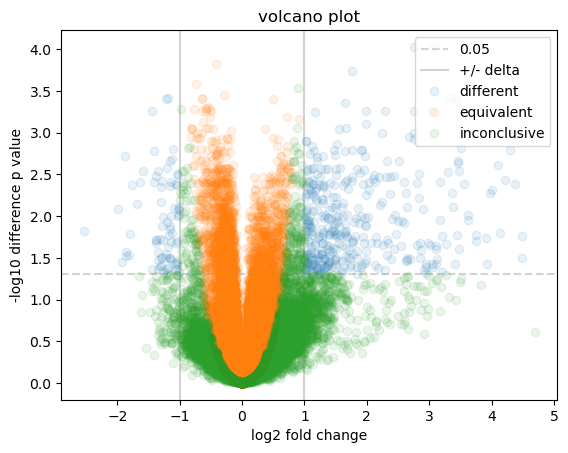

In [114]:
plt.axhline(y=1.301,color="lightgray", label = "0.05", linestyle="--")
plt.axvline(x = 1, color = "lightgray", linestyle="-")
plt.axvline(x = -1, color = "lightgray", linestyle="-", label = "+/- delta")
for cat, group in results.groupby("category"):
    #plt.plot(results["eff_size"], -np.log10(results["diff_pval_adj"]), marker = "o", linestyle="",alpha=0.1, label = "all data")

    plt.plot(group["eff_size"], -np.log10(group["diff_pval_adj"]), marker = "o", linestyle="",alpha=0.1, label = cat)

plt.legend()

plt.xlabel("log2 fold change")
plt.ylabel("-log10 difference p value")
plt.title("volcano plot")
plt.show()

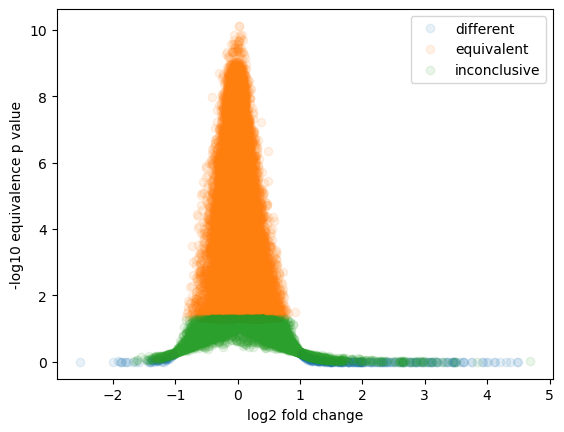

In [37]:

for cat, group in results.groupby("category"):
    plt.plot(group["eff_size"], -np.log10(group["equiv_pval_adj"]), marker = "o", linestyle="",alpha=0.1, label = cat)
plt.legend()
plt.xlabel("log2 fold change")
plt.ylabel("-log10 equivalence p value")
plt.show()

Prrxl1      4.028823
Scgn        4.028823
Rfng        3.822612
Sema5b      3.737055
Ephb2       3.581679
              ...   
Zc3h8       0.000125
n.R5s197    0.000125
Gm25821     0.000125
Olfr1301    0.000125
Gm6723      0.000025
Name: diff_pval_adj, Length: 32252, dtype: float64

In [31]:
results["category"] = "inconclusive"

results.loc[results["sig_diff"],"category"] = "different"
results.loc[results["sig_equiv"],"category"] = "equivalent"
results

,avg_group1_log2,avg_group2_log2,nnz_group1,nnz_group2,eff_size,avg_group1,avg_group2,fold_change,diff_pval,equiv_pval,diff_pval_adj,equiv_pval_adj,sig_diff,sig_equiv,category
Prrxl1,6.083772,3.325149,6,6,2.758623,67.826258,10.022349,6.767501,3.388911e-09,9.999999e-01,0.000094,9.999999e-01,True,False,different
Scgn,6.825182,3.747797,6,6,3.077385,113.392540,13.433816,8.440829,5.802966e-09,9.999999e-01,0.000094,9.999999e-01,True,False,different
Rfng,9.092809,9.510107,6,6,-0.417298,546.019601,729.167929,0.748826,1.399436e-08,3.015951e-10,0.000150,1.045919e-08,False,True,equivalent
Sema5b,7.535782,5.774549,6,6,1.761234,185.565186,54.740956,3.389878,2.272211e-08,9.999820e-01,0.000183,9.999999e-01,True,False,different
Ephb2,8.706187,9.438369,6,6,-0.732182,417.660430,693.796616,0.601993,4.458125e-08,1.136613e-04,0.000262,3.273623e-04,False,True,equivalent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zc3h8,6.294303,6.294354,6,6,-0.000051,78.482720,78.485497,0.999965,9.996445e-01,2.440081e-06,0.999713,9.984458e-06,False,True,equivalent
n.R5s197,1.892780,1.892667,6,6,0.000112,3.713500,3.713211,1.000078,9.996722e-01,1.872066e-03,0.999713,4.164854e-03,False,True,equivalent
Gm25821,0.685335,0.685499,4,3,-0.000164,1.608076,1.608258,0.999887,9.996806e-01,1.636953e-02,0.999713,2.680222e-02,False,True,equivalent
Olfr1301,0.449902,0.450075,2,2,-0.000173,1.365947,1.366111,0.999880,9.996823e-01,2.015926e-02,0.999713,3.175621e-02,False,True,equivalent


In [97]:
calc_df = results
calc_df["avg_log2"] = calc_df[["avg_group1_log2", "avg_group2_log2"]].mean(axis=1)
calc_df["avg"] = calc_df[["avg_group1", "avg_group2"]].mean(axis=1)
k = 10
calc_df["depth_quantile"] = pd.qcut(calc_df['avg'], k, labels=False)
calc_df["depth_quantile_name"] = pd.qcut(calc_df['avg'], k)

In [102]:
calc_df["depth_quantile_name"]

Prrxl1         (16.316, 65.308]
Scgn           (16.316, 65.308]
Rfng        (487.554, 1001.513]
Sema5b        (65.308, 219.551]
Ephb2       (487.554, 1001.513]
                   ...         
Zc3h8         (65.308, 219.551]
n.R5s197         (2.501, 5.477]
Gm25821          (1.569, 2.501]
Olfr1301         (1.231, 1.569]
Gm6723          (5.477, 16.316]
Name: depth_quantile_name, Length: 32252, dtype: category
Categories (10, interval[float64, right]): [(1.1010000000000002, 1.231] < (1.231, 1.569] < (1.569, 2.501] < (2.501, 5.477] ... (65.308, 219.551] < (219.551, 487.554] < (487.554, 1001.513] < (1001.513, 75384.404]]

In [103]:
# Assuming calc_df["depth_quantile_name"] is the column with the intervals
def round_interval(interval):
    return pd.Interval(round(interval.left, 1), round(interval.right, 1), closed=interval.closed)

# Apply the rounding function to each interval in the column
calc_df["depth_quantile_name_rounded"] = calc_df["depth_quantile_name"].apply(round_interval)


In [105]:
calc_df["depth_quantile_name_rounded"].unique()

[(16.3, 65.3], (487.6, 1001.5], (65.3, 219.6], (1001.5, 75384.4], (219.6, 487.6], (5.5, 16.3], (1.2, 1.6], (2.5, 5.5], (1.6, 2.5], (1.1, 1.2]]
Categories (10, interval[float64, right]): [(1.1, 1.2] < (1.2, 1.6] < (1.6, 2.5] < (2.5, 5.5] ... (65.3, 219.6] < (219.6, 487.6] < (487.6, 1001.5] < (1001.5, 75384.4]]

In [106]:
out_dict = {"quant_name" : [], "quant" : [], "num_genes" : [], "num_diff" : [], "num_equiv" : [], "num_incon" : []}


for quant, quantdf in calc_df.groupby("depth_quantile"):
    out_dict["quant_name"].append(quantdf["depth_quantile_name_rounded"].astype(str)[0])
    out_dict["quant"].append(quant)
    out_dict["num_genes"].append(quantdf.shape[0])
    out_dict["num_diff"].append(quantdf[quantdf["category"] == "different"].shape[0])
    out_dict["num_equiv"].append(quantdf[quantdf["category"] == "equivalent"].shape[0])
    out_dict["num_incon"].append(quantdf[quantdf["category"] == "inconclusive"].shape[0])
out = pd.DataFrame(out_dict)
out["frac_diff"] = out["num_diff"]/out["num_genes"]
out["frac_equiv"] = out["num_equiv"]/out["num_genes"]
out["frac_incon"] = out["num_incon"]/out["num_genes"]

In [107]:

out

,quant_name,quant,num_genes,num_diff,num_equiv,num_incon,frac_diff,frac_equiv,frac_incon
0,"(1.1, 1.2]",0,3226,0,2941,285,0.000000,0.911655,0.088345
1,"(1.2, 1.6]",1,3225,0,1672,1553,0.000000,0.518450,0.481550
2,"(1.6, 2.5]",2,3225,35,651,2539,0.010853,0.201860,0.787287
3,"(2.5, 5.5]",3,3225,55,821,2349,0.017054,0.254574,0.728372
4,"(5.5, 16.3]",4,3225,112,1795,1318,0.034729,0.556589,0.408682
5,"(16.3, 65.3]",5,3225,131,2462,632,0.040620,0.763411,0.195969
6,"(65.3, 219.6]",6,3225,51,2947,227,0.015814,0.913798,0.070388
7,"(219.6, 487.6]",7,3225,20,3127,78,0.006202,0.969612,0.024186
8,"(487.6, 1001.5]",8,3225,12,3153,60,0.003721,0.977674,0.018605
9,"(1001.5, 75384.4]",9,3226,23,3145,58,0.007130,0.974892,0.017979


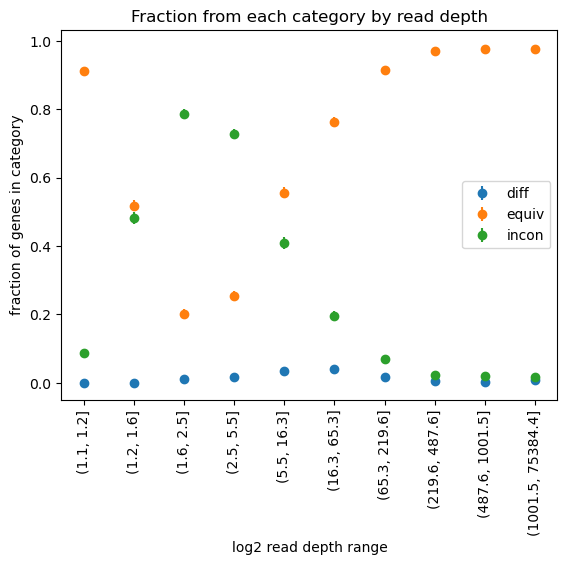

In [110]:
for cat in ["diff", "equiv", "incon"]:
    #plt.plot(out["quant"], out["frac_" + cat], marker = "o", linestyle = "", label = cat)
    plt.errorbar(out["quant"], out["frac_" + cat], yerr=1.96*np.sqrt(out["frac_" + cat]*(1 - out["frac_" + cat])/out["num_genes"]), fmt="o", label = cat)
plt.ylabel("fraction of genes in category")
plt.xlabel("log2 read depth range")
plt.xticks(out["quant"], out["quant_name"], rotation='vertical')
plt.legend()
plt.title("Fraction from each category by read depth")
plt.show()

In [89]:
np.sqrt(out["frac_" + cat]*(1 - out["frac_" + cat])/out["num_genes"])

0    0.005624
1    0.005835
2    0.006813
3    0.004862
4    0.002195
5    0.001778
dtype: float64

In [63]:
calc_df["avg_log2"].quantile(6)

ValueError: percentiles should all be in the interval [0, 1]. Try 0.06 instead.